<center>
<h1>CSE 6363-007: Machine Learning Assignment 2</h1> 
    <h2>Name: Ananthula, Vineeth Kumar. UTA ID: 1001953922</h2>
</center>
    

# Note:

### Make sure you have installed the below two before running the code
1. mlxtend: conda install -c conda-forge mlxtend
2. tabulate: conda install -c conda-forge tabulate

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import pandas as pd
import itertools
from sklearn.metrics import accuracy_score
onehot_encoder = OneHotEncoder(sparse=False)

In [2]:
from mlxtend.plotting import plot_decision_regions
from tabulate import tabulate

# Logistic Regression

In [3]:
def gradient(X, Y, W, m):
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * m * W
    return gd

def loss(X, Y, W):
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def grad_desc(X, Y, max_iter=1000, eta=0.1, m=0.01):
    Y_h = onehot_encoder.fit_transform(Y.reshape(-1,1))
    step = 0
    step_lst,loss_lst,W_lst = [],[],[]
    W = np.zeros((X.shape[1], Y_h.shape[1]))
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_h, W, m)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_h, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class LogisticRegression:
    def fit(self, X, Y):
        self.loss_steps, self.W = grad_desc(X, Y)

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    

# Linear Discriminant Analysis

In [4]:
class LDA:
    def fit(self, X, t):
        self.means,self.priors= dict(),dict()
        self.cov = np.cov(X, rowvar=False)  
        self.classes = np.unique(t)   
        
        for i in self.classes:
            X_c = X[t == i] 
            self.means[i] = np.mean(X_c, axis=0) 
            self.priors[i] = X_c.shape[0] / X.shape[0]
            
    def predict(self, X):
        res = list()
        for x in X:
            pt_list = list()
            for i in self.classes:
                inv_cov = np.linalg.inv(self.cov)
                prior = np.log(self.priors[i])
                diff = x-self.means[i]
                inv_cov_det = np.linalg.det(inv_cov) 
                l = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                p = prior + l
                pt_list.append(p)
            pd = self.classes[np.argmax(pt_list)]
            res.append(pd)
        return np.array(res)


# Preparing the Data

In [5]:
iris = load_iris()
print(iris.data.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X=iris.data
y=iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=30)

In [8]:
X_test.shape

(15, 4)

In [9]:
X_train.shape

(135, 4)

In [10]:
accuracies=[]

# Testing with Logistic Regression

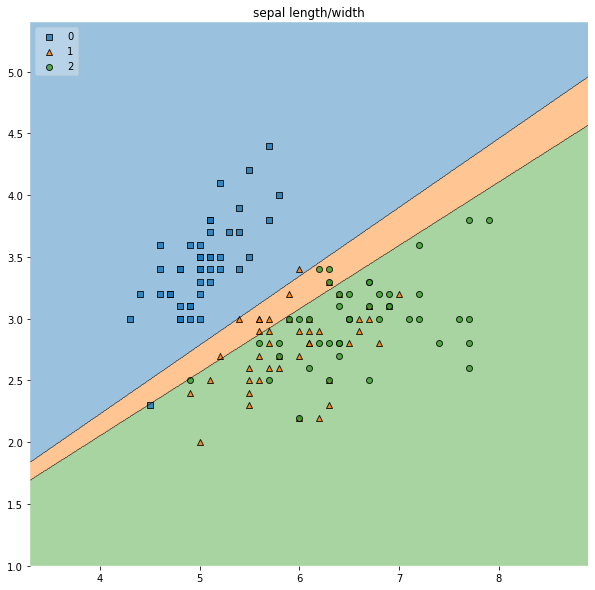

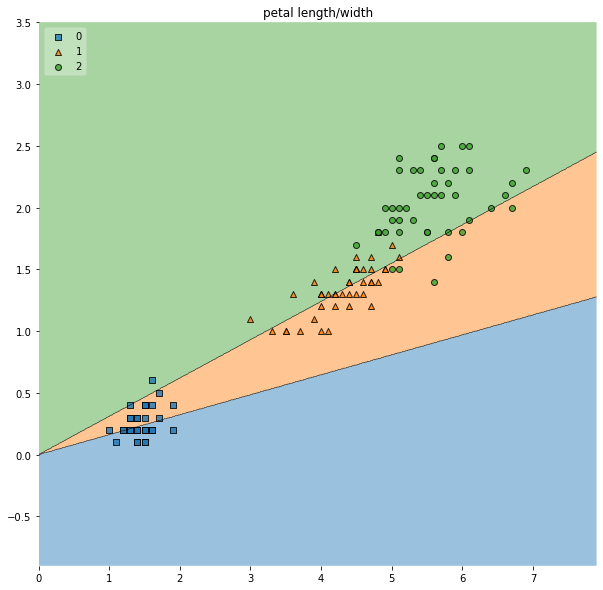

In [11]:
def diag(x,y,lbl):
    clf.fit(x,y)
    #ax=plt.subplot(gs[0,0])
    fig = plt.figure(figsize=(10,10))
    fig=plot_decision_regions(X=x,y=y,clf=clf,legend=2)
    plt.title(lbl)  
    
#classifier 1
accuracies.append([0.0,0.0,0.0])
#gs = gridspec.GridSpec(2,2)
#fig = plt.figure(figsize=(10,8))
clf = LogisticRegression()
# Testing with Logistic Regression for sepal length/width
diag(X_train[:,:2],y_train,"sepal length/width")
plt.show()
accuracies[0][0]=accuracy_score(clf.predict(X_test[:,:2]),y_test)*100
# Testing with Logistic Regression for petal length/width
diag(X_train[:,2:],y_train,"petal length/width")
plt.show()
accuracies[0][1]=accuracy_score(clf.predict(X_test[:,2:]),y_test)*100
clf.fit(X_train,y_train)
# Testing with Logistic Regression for all features
accuracies[0][2]=accuracy_score(clf.predict(X_test),y_test)*100

# Testing with Linear Discriminant Analysis

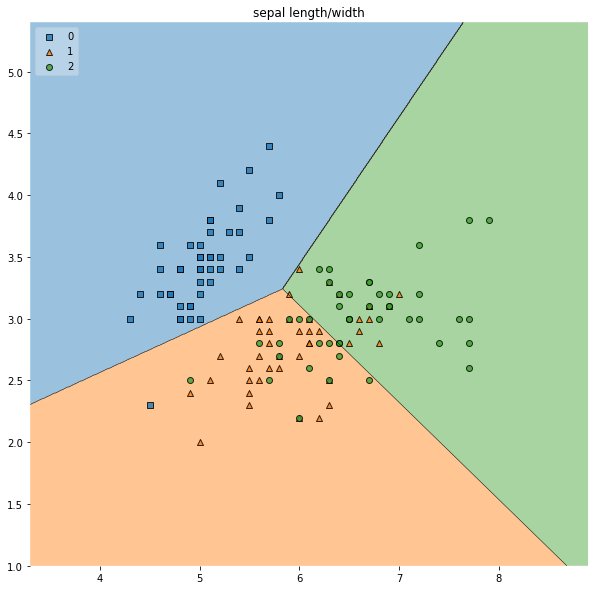

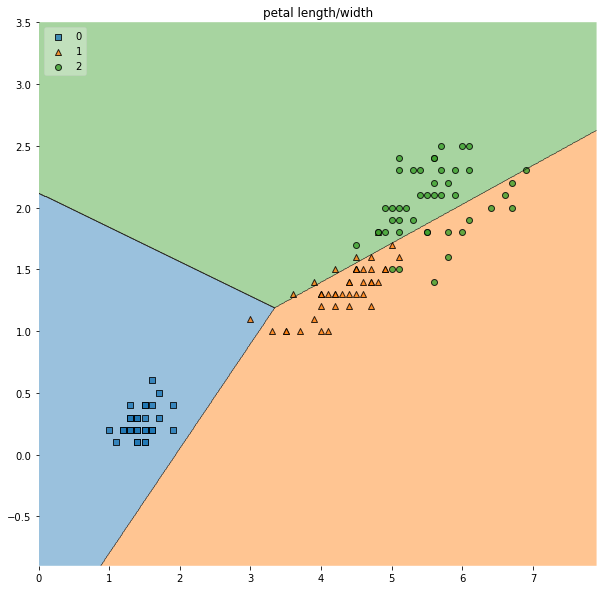

In [12]:
def diag1(x,y,lbl):
    clf.fit(x,y)
    #ax1=plt.subplot(gs1[0,0])
    fig1 = plt.figure(figsize=(10,10))
    fig1=plot_decision_regions(X=x,y=y,clf=clf,legend=2)
    plt.title(lbl)  
    
#classifier 2
accuracies.append([0.0,0.0,0.0])
#gs1 = gridspec.GridSpec(2,2)
clf = LDA()
# Testing with Linear Discriminant Analysis for sepal length/width
diag1(X_train[:,:2],y_train,"sepal length/width")
plt.show()
# Testing with Linear Discriminant Analysis for petal length/width
accuracies[1][0]=accuracy_score(clf.predict(X_test[:,:2]),y_test)*100
diag1(X_train[:,2:],y_train,"petal length/width")
plt.show()
accuracies[1][1]=accuracy_score(clf.predict(X_test[:,2:]),y_test)*100
clf.fit(X_train,y_train)
# Testing with Linear Discriminant Analysis all features
accuracies[1][2]=accuracy_score(clf.predict(X_test),y_test)*100

In [13]:
accuracies

[[66.66666666666666, 80.0, 100.0],
 [80.0, 86.66666666666667, 86.66666666666667]]

In [14]:
accuracies[1]

[80.0, 86.66666666666667, 86.66666666666667]

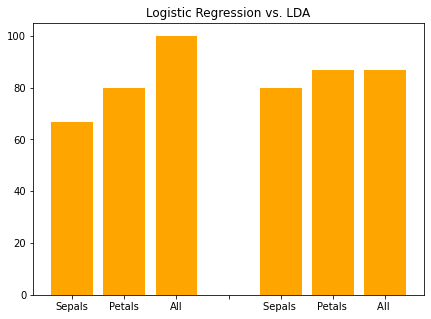

In [15]:
plt.figure(figsize=(7,5))
x=['Sepals','Petals','All',' ','Sepals ','Petals ','All ']
y=accuracies[0]+[0]+accuracies[1]
plt.bar(x,y,color='orange')
plt.title('Logistic Regression vs. LDA')
plt.show()

In [16]:
accuracies[0]=["Logistic Regression"]+accuracies[0]
accuracies[1]=["Linear Discriminant Analysis"]+accuracies[1]

# Results

In [17]:
head=["Sepals","Petals","All Features"]
print(tabulate(accuracies,headers=head,tablefmt="grid"))

+------------------------------+----------+----------+----------------+
|                              |   Sepals |   Petals |   All Features |
+==============================+==========+==========+================+
| Logistic Regression          |  66.6667 |  80      |       100      |
+------------------------------+----------+----------+----------------+
| Linear Discriminant Analysis |  80      |  86.6667 |        86.6667 |
+------------------------------+----------+----------+----------------+
